# Random Forest Classifier 

## Content   <a name="content"></a>

1. [Load data](#1)
2. [ML with all features. Choosing the algorithm](#2)
3. [ML with all features. Random Forest Classfier](#3)
4. [Comparison between three methods that determine the feature importance](#4)
5. [Hyper-parameter tuning of the model with the reduced features](#5)
6. [Cross validation of the model with the reduces number of features](#6)
7. [Confusion matrix and classification report](#7)
8. [Check for overfitting](#8)
9. [Demo](#9)

In [1]:
# pip install pandas
# pip install missingno
# pip install rdkit
# pip install chemformula
# pip install tables
# pip install imbalanced-learn

## Load data <a name="1"></a>

In [2]:
import pandas as pd 

# load the BioAssay PubChem AID 504332 dataset
df = pd.read_csv('data_classification_rus.csv', index_col=[0])

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (54800, 60)


,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
0,338.15,101.0,22.1,22,2,5,4,1,11.1029,12.2938,19.560884,19.880090,5.7507,7.0497,20.039072,20.024753,1.960485,2.260680e-03,10.8933,12.9884,20.326900,19.834875,3.6408,5.8658,20.399709,20.150295,2.2914,3.5357,19.564687,19.621665,33.644939,21.234127,20.318394,20.168176,0.39,0.29,0.03,0.00,0.23,0.0,0.06,0.00,42.62,2.68,4.73,0.00,29.00,0.0,20.97,0.00,21.930704,21.743876,2.992007,2.214259,4.753993,3.673502,1.588898,1.659021,20.045,0
1,213.34,49.5,22.0,14,1,3,7,1,4.8370,4.8370,19.528825,19.659190,12.3764,12.3764,19.900737,19.863248,0.000000,1.019394e-07,11.7691,13.7518,20.085611,19.818801,2.2006,3.9219,19.787104,19.857911,1.7940,3.5528,20.520259,20.219368,36.029652,20.175852,20.431292,20.134254,0.33,0.58,0.03,0.03,0.03,0.0,0.00,0.00,61.93,8.98,7.50,15.03,6.57,0.0,0.00,0.00,20.390824,20.390824,5.348132,3.506413,6.560256,3.870694,1.226644,1.103890,20.079,0
2,367.80,72.6,23.1,26,0,5,4,1,13.9821,13.9821,19.988476,19.863024,6.9048,8.1048,19.702678,19.666535,0.195432,1.215867e-03,11.1799,12.6485,20.101761,20.071560,5.3409,7.4355,19.595081,19.774410,3.0965,4.7994,19.901897,20.031587,27.440217,20.039179,20.022101,20.033859,0.45,0.35,0.05,0.00,0.12,0.0,0.02,0.00,58.78,3.84,8.70,0.00,19.04,0.0,9.64,0.00,22.024983,21.725163,2.093261,1.701096,3.610496,2.635434,1.724818,1.549256,20.049,0
3,362.30,52.6,24.6,26,0,7,5,1,15.6027,16.6424,19.897255,19.980398,5.2364,7.6364,20.039977,20.069982,20.953803,6.207105e-02,9.6228,11.2012,20.347999,20.376776,6.4125,8.2830,20.034562,20.057674,2.6905,4.8337,20.031341,20.006551,40.038239,20.045891,20.092329,20.137703,0.49,0.33,0.10,0.00,0.00,0.0,0.00,0.08,62.99,3.62,17.66,0.00,0.00,0.0,0.00,15.73,22.979662,22.179352,1.500632,1.352312,3.576584,2.317314,2.383386,1.713594,20.057,0
4,293.40,58.0,24.2,22,2,4,5,1,11.4414,12.4819,20.598515,20.550924,7.4954,7.4954,20.500048,20.715278,0.083054,8.205571e-04,11.1360,13.5628,21.018719,20.450663,7.5006,9.5441,19.641534,19.617805,2.4180,4.3160,20.004521,19.969626,88.595094,21.270862,21.162422,20.143262,0.44,0.46,0.02,0.00,0.07,0.0,0.00,0.00,73.69,6.53,5.45,0.00,14.32,0.0,0.00,0.00,21.526456,21.665275,1.484681,1.421066,4.605459,3.142447,3.101985,2.211330,20.054,0


In [3]:
df.describe(include="all")

,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
count,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.0,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000,54800.000000
mean,364.469470,88.536985,23.032325,25.423412,1.202847,5.114051,4.968978,1.0,10.800767,11.319495,20.027363,20.025716,9.308930,9.830069,19.974284,19.992044,5.901413,0.035059,11.407973,13.378945,20.006783,20.007773,5.697682,7.646819,19.996614,19.996824,3.021537,4.832901,20.004652,20.001879,57.400989,20.319959,20.453293,20.437365,0.413635,0.424841,0.066586,0.015127,0.068569,0.001327,0.004700,0.005010,60.850495,5.349574,12.814067,5.518519,11.551715,1.013256,1.782286,1.117457,21.389733,21.326493,2.245295,1.847922,84.474721,24.774191,40.858505,16.292609,20.057677,0.499489
std,78.338495,32.697785,1.300295,5.547277,0.917629,1.819172,2.275634,0.0,3.716861,3.639151,0.315705,0.289401,3.673458,3.564510,0.383311,0.335035,82.102126,0.443031,2.859655,2.810828,0.322440,0.290013,1.843971,1.760529,0.455943,0.330622,1.305392,1.401494,0.559765,0.351065,78.553227,1.224202,6.748064,6.608055,0.043988,0.059073,0.036874,0.018440,0.035249,0.006541,0.012977,0.017238,8.575634,1.374157,6.728130,6.364018,5.567613,4.717126,4.627165,3.607347,0.893564,0.719979,1.048360,0.610457,856.181617,436.974204,465.178714,312.574177,0.017482,0.500004
min,76.090000,0.000000,11.800000,5.000000,0.000000,0.000000,0.000000,1.0,0.500000,1.334900,18.442165,18.703403,0.354000,0.412500,18.426513,18.706251,0.000000,0.000000,0.975000,3.899900,18.360392,18.667194,0.166000,2.242100,17.566934,18.305010,0.000100,0.000200,16.089203,14.612511,0.000000,20.000087,20.000000,20.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.115473,20.158514,0.537249,0.728110,0.596586,0.605246,0.210874,0.589929,20.000000,0.000000
25%,309.320000,66.200000,22.200000,22.000000,1.000000,4.000000,3.000000,1.0,8.058975,8.819700,19.826239,19.837117,6.635900,7.250800,19.717855,19.763825,0.000000,0.000001,9.347775,11.347075,19.804888,19.816079,4.352575,6.329900,19.709418,19.791599,2.334375,4.121675,19.722693,19.832476,26.003169,20.046405,20.040817,20.039387,0.380000,0.390000,0.040000,0.000000,0.040000,0.000000,0.000000,0.000000,55.320000,4.400000,8.260000,0.000000,7.810000,0.000000,0.000000,0.000000,20.812437,20.827175,1.495609,1.383973,2.821291,2.182442,1.431012,1.296899,20.049000,0.000000
50%,363.400000,85.900000,23.100000,25.000000,1.000000,5.000000,5.000000,1.0,10.390050,11.159400,20.017260,20.016436,9.054500,9.614600,19.977259,19.995365,0.055640,0.000119,11.180100,13.151800,20.001406,20.004532,5.639550,7.543550,19.999001,19.997836,2.861600,4.802600,20.001155,20.000198,40.218986,20.113809,20.099341,20.098352,0.410000,0.430000,0.060000,0.010000,0.060000,0.000000,0.000000,0.000000,61.220000,5.300000,12.650000,6.060000,10.970000,0.000000,0.000000,0.000000,21.157117,21.154277,1.973088,1.7199

[<a href="#content">Back to top</a>]

## ML with all features. Choosing the algorithm  <a name="2"></a>

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target'], axis=1)
y = df['target']

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (43840, 59)
X_test:   (10960, 59)
y_train:  (43840,)
y_test:   (10960,)


In [5]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(kernel='rbf', C=1, probability=True),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "XGBoost":XGBClassifier(verbosity=0) }

In [6]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
4,XGBoost,0.681,0.682,0.677,0.679,0.681
0,SVM,0.678,0.683,0.662,0.672,0.678
2,RandomForest,0.677,0.678,0.671,0.674,0.677
3,GradientBoost,0.651,0.659,0.625,0.641,0.651
1,Decision,0.581,0.580,0.582,0.581,0.581


In [7]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
       # scoring = ['precision_macro', 'recall_macro']
        model.fit(X_train,y_train)
        scores = cross_val_score(model, X, y, cv=5)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
4,XGBoost,0.6790,0.0044,"[0.6816, 0.678, 0.6835, 0.6808, 0.6709]"
2,RandomForest,0.6761,0.0038,"[0.6761, 0.6767, 0.6807, 0.6781, 0.6692]"
3,GradientBoost,0.6494,0.0068,"[0.6515, 0.6471, 0.6616, 0.6422, 0.6446]"
1,Decision,0.5847,0.0024,"[0.5839, 0.5811, 0.5872, 0.5875, 0.5839]"
0,SVM,0.5756,0.0029,"[0.5738, 0.5747, 0.5766, 0.5807, 0.5723]"


[<a href="#content">Back to top</a>]

## Overfitting exploration <a name="3"></a>

In [8]:
import matplotlib.pyplot as plt

# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = XGBClassifier(max_depth=i)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.612, test: 0.616
>2, train: 0.652, test: 0.639
>3, train: 0.695, test: 0.668
>4, train: 0.734, test: 0.672
>5, train: 0.789, test: 0.680
>6, train: 0.848, test: 0.681
>7, train: 0.910, test: 0.678
>8, train: 0.965, test: 0.671
>9, train: 0.988, test: 0.678
>10, train: 0.998, test: 0.686
>11, train: 0.999, test: 0.677
>12, train: 0.999, test: 0.684
>13, train: 0.999, test: 0.684
>14, train: 0.999, test: 0.683
>15, train: 0.999, test: 0.686
>16, train: 0.999, test: 0.687
>17, train: 0.999, test: 0.688
>18, train: 0.999, test: 0.683
>19, train: 0.999, test: 0.689
>20, train: 0.999, test: 0.681


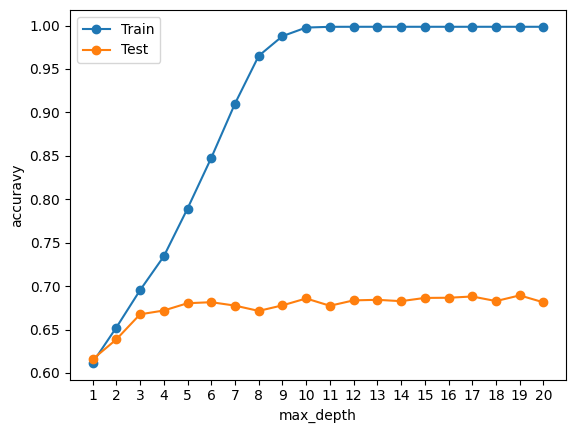

In [9]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## ML with all features. Random Forest Classfier <a name="3"></a>

In [10]:
# Instantiate the estimator 
model = XGBClassifier(random_state=1, max_depth=3)
#  Train the model
model.fit(X_train, y_train)
# Make a prediction
prediction = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, prediction)
print("The accuracy of the model with Random forest classifier algorithm is: ", accuracy)

The accuracy of the model with Random forest classifier algorithm is:  0.6675182481751825


[<a href="#content">Back to top</a>]